In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KID import KID
import datacalc
import kidcalc
from scipy import interpolate

In [6]:
KIDnum = 6
Pread = 92
Tbath = 220
wvlngth = 402

S21data,peakdata_ph,peakdata_amp = datacalc.get_data(KIDnum,Pread,Tbath,wvlngth)

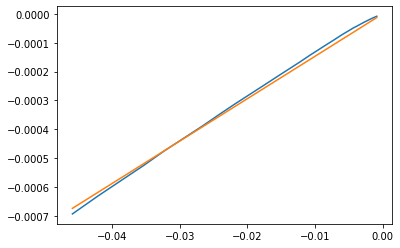

In [7]:
#Set constants for kid init
Tind = np.abs(S21data[:,1]*1000-Tbath).argmin()
Qc = S21data[Tind,3]
hw0 = .6582*1e-9*np.pi*2*S21data[0,5]
kbT0 = 86.17*S21data[0,1]
V = S21data[0,14]
d = S21data[0,25]
ak = datacalc.ak(S21data)
kbT = datacalc.kbTbeff(S21data,peakdata_ph)

k = KID(Qc = Qc,hw0 = hw0, kbT0 = kbT0, kbT = kbT, 
        V = V, ak = ak, d = d)
k.epb = .2

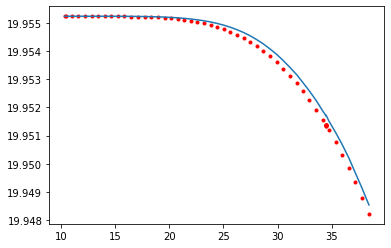

In [4]:
for kbTi in S21data[:,1]*86.17:
    D = kidcalc.D(kbTi,k.N0,k.Vsc,k.kbTD)
    plt.plot(kbTi,kidcalc.hwread(hw0,kbT0,ak,k.lbd0,d,D
                                ,k.D0,kbTi,k.N0,k.Vsc,k.kbTD),'r.')
plt.plot(S21data[:,1]*86.17,S21data[:,5]*2*np.pi*.6582*1e-9)